In [44]:
import pandas as pd

#### Functions

In [43]:
def count(content, count_dic) :
    words = content.split()
    count_a = count_dic['A']
    count_an = count_dic['An']
    count_the = count_dic['The']
    for word in words:
        if word.lower() == 'a' :
            count_a += 1
        if word.lower() == 'an' :
            count_an += 1
        if word.lower() == 'the' :
            count_the += 1
    return (count_a, count_an, count_the)

In [42]:
def get_articles_count(articles):
    current_counts = {'A':0, 'An': 0, 'The': 0}
    result = {}
    i = 0
    for article in articles:
        current_counts['A'], current_counts['An'], current_counts['The'] = count(article, current_counts)
        result[i] = current_counts
        i = i + 1
        current_counts = {'A':0, 'An': 0, 'The': 0}
    return result

### Real SHit

In [4]:
df = pd.read_csv('combined.csv')
df.head()

,Unnamed: 0,content,type
0,0,"Lila Rose, president of the pro-life group Liv...",bias
1,1,The mobile shortcut will then be added as an i...,bias
2,2,Two black leaders who were prevented from demo...,bias
3,3,The website from which you got to this page is...,bias
4,4,A federal court has issued a decision to dismi...,bias


In [5]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [6]:
df['type'].value_counts()

fake          500
hate          500
unreliable    500
junksci       500
clickbait     500
reliable      500
bias          500
political     500
unknown       500
rumor         500
conspiracy    500
satire        500
Name: type, dtype: int64

# A, An, The

In [59]:

bias_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'bias']['content'])).transpose()
political_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'political']['content'])).transpose()
conspiracy_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'conspiracy']['content'])).transpose()
clickbait_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'clickbait']['content'])).transpose()
satire_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'satire']['content'])).transpose()
rumor_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'rumor']['content'])).transpose()
fake_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'fake']['content'])).transpose()
hate_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'hate']['content'])).transpose()
unreliable_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'unreliable']['content'])).transpose()
junksci_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'junksci']['content'])).transpose()
unknown_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'unknown']['content'])).transpose()
reliable_articles_counts = pd.DataFrame(get_articles_count(df[df['type'] == 'reliable']['content'])).transpose()


In [62]:
rumor_articles_counts.head()

,A,An,The
0,10,1,8
1,7,2,25
2,1,2,3
3,14,1,59
4,7,1,38


The columns contains the occurances of their name.
Each row is a different article.
Name of the dataframe is self-Explanatory.

### Sanity Check

In [46]:
hate_articles_counts = get_articles_count(df[df['type'] == 'hate']['content'])

In [57]:
test = pd.DataFrame(hate_articles_counts)
test.transpose().head()

,A,An,The
0,0,0,4
1,0,0,1
2,4,2,40
3,0,0,3
4,1,1,17


In [51]:
x = df[df['type'] == 'hate']['content']
x = x[1000]

In [52]:
count(x,{'A':0,'An':0,'The':0})

(0, 0, 4)

In [53]:
x

'Unfortunately, he hasn’t yet attacked her for Islamic terrorism-connections, but we know he will. Below are several links that explain in detail why having Huma Abedin anywhere near the White House would be like inviting in the terrorism-linked Muslim Brotherhood, which has been banned in Egypt and the UAE. BNI Readers, please forward the damning […]'

#### Plots

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


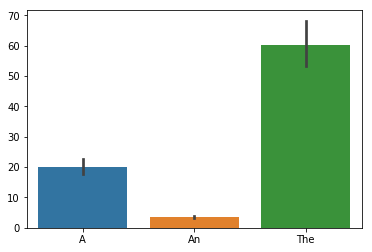

In [80]:
sns.barplot(data = bias_articles_counts)

In [81]:
import numpy 
x = numpy.mean(bias_articles_counts['A'])
x

20.022

<Figure size 1080x504 with 0 Axes>

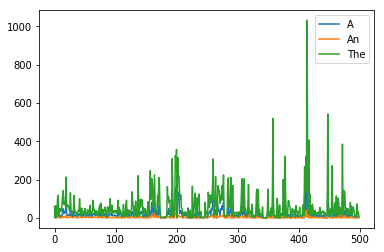

In [72]:
plt.figure(figsize = (15,7))
bias_articles_counts.plot()

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


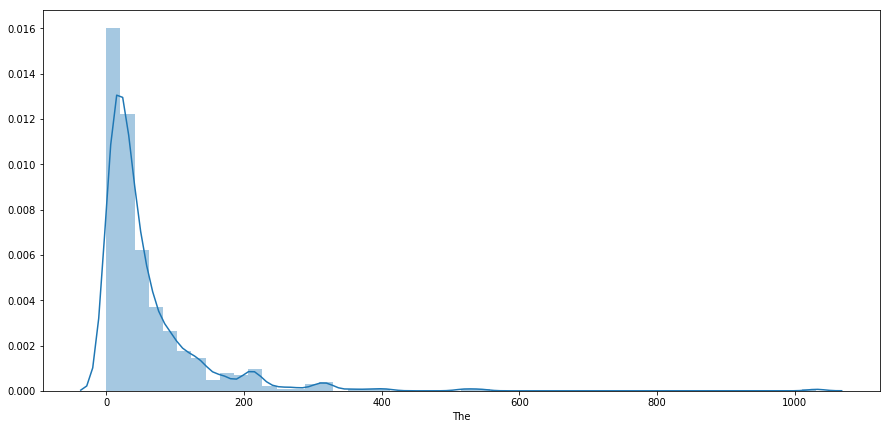

In [75]:
plt.figure(figsize = (15,7))
sns.distplot(bias_articles_counts['The'])

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


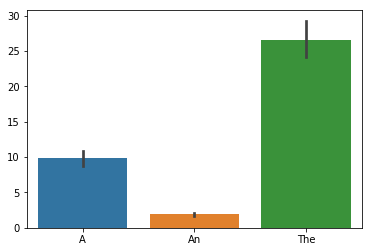

In [82]:
sns.barplot(data = political_articles_counts)

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


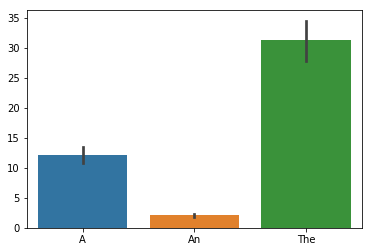

In [83]:
sns.barplot(data = conspiracy_articles_counts)

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


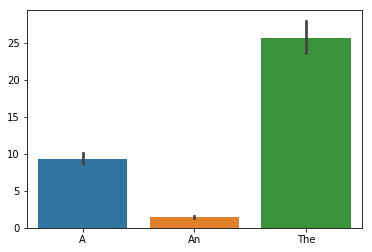

In [84]:
sns.barplot(data = clickbait_articles_counts)

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


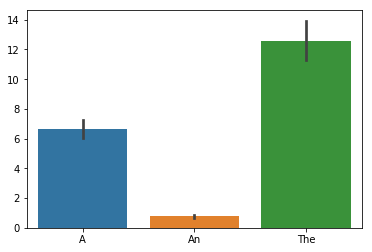

In [85]:
sns.barplot(data = satire_articles_counts)

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


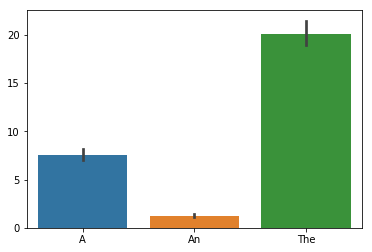

In [86]:
sns.barplot(data = rumor_articles_counts)

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


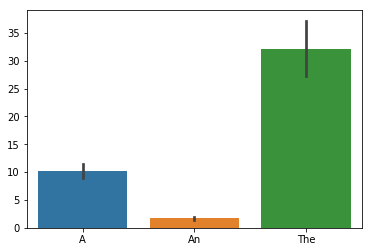

In [87]:
sns.barplot(data = fake_articles_counts)

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


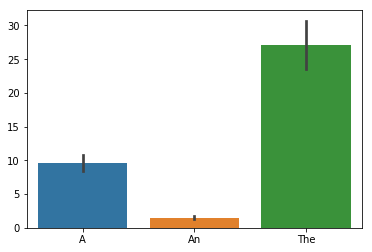

In [88]:
sns.barplot(data = unreliable_articles_counts)

In [4]:
'''
If we could understand how the articles, prepositions are used in Real and Fakes.
Does the real one uses it more at the start of the string then at the end and so on.
The graphs above don't speak much! (I guess)
'''
'-_-'

'-_-'